Loading data from: F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\operation_points\data\weighted_hf_t1_t3.csv
Successfully loaded 207 records.
Calculating quantiles...
  30th Percentile (q30): 0.999645
  50th Percentile (q50): 1.008732
  80th Percentile (q80): 1.046106
Generating plot...
Saving plot to: F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\operation_points\visalization\weighted_hf_with_quantiles.png
Visualization complete.


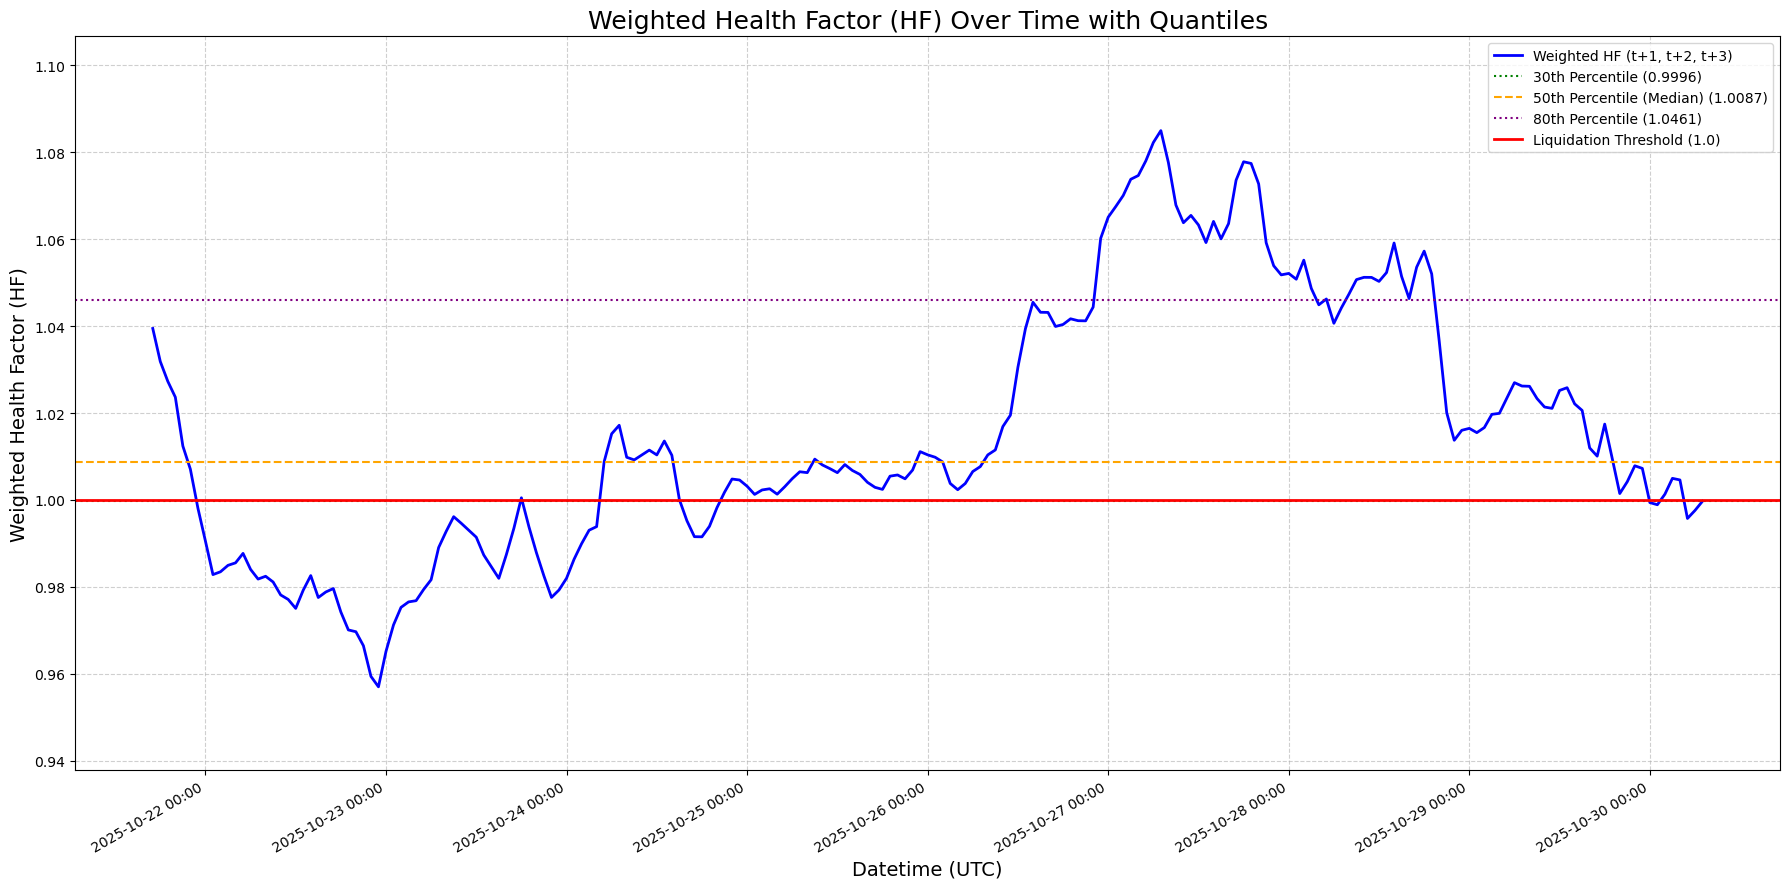

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import numpy as np

# --- 1. Define Paths ---
BASE_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\operation_points"
DATA_DIR = os.path.join(BASE_PATH, "data")
VIS_DIR = os.path.join(BASE_PATH, "visalization") # User specified 'visalization'

INPUT_FILE = os.path.join(DATA_DIR, "weighted_hf_t1_t3.csv")
OUTPUT_FILE = os.path.join(VIS_DIR, "weighted_hf_with_quantiles.png")

# Ensure output directory exists
os.makedirs(VIS_DIR, exist_ok=True)

try:
    # --- 2. Load Data ---
    print(f"Loading data from: {INPUT_FILE}")
    df = pd.read_csv(INPUT_FILE)
    df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
    print(f"Successfully loaded {len(df)} records.")

    # --- 3. Calculate Quantiles ---
    print("Calculating quantiles...")
    q30 = np.percentile(df['Weighted_HF'], 30)
    q50_median = np.percentile(df['Weighted_HF'], 50)
    q80 = np.percentile(df['Weighted_HF'], 80)
    
    print(f"  30th Percentile (q30): {q30:.6f}")
    print(f"  50th Percentile (q50): {q50_median:.6f}")
    print(f"  80th Percentile (q80): {q80:.6f}")
    
    # Also get the 1.0 threshold for context
    liquidation_threshold = 1.0

    # --- 4. Create Plot ---
    print("Generating plot...")
    plt.figure(figsize=(18, 9))
    
    # Plot the main Weighted_HF line
    plt.plot(df['datetime_utc'], df['Weighted_HF'], 
             label='Weighted HF (t+1, t+2, t+3)', 
             color='blue', 
             linewidth=2)

    # Plot the quantile lines
    plt.axhline(y=q30, color='green', linestyle=':', linewidth=1.5, 
                label=f'30th Percentile ({q30:.4f})')
    plt.axhline(y=q50_median, color='orange', linestyle='--', linewidth=1.5, 
                label=f'50th Percentile (Median) ({q50_median:.4f})')
    plt.axhline(y=q80, color='purple', linestyle=':', linewidth=1.5, 
                label=f'80th Percentile ({q80:.4f})')
                
    # Plot the liquidation line (HF=1.0)
    plt.axhline(y=liquidation_threshold, color='red', linestyle='-', linewidth=2.0, 
                label=f'Liquidation Threshold ({liquidation_threshold:.1f})')

    # --- 5. Format Plot (All in English) ---
    plt.title('Weighted Health Factor (HF) Over Time with Quantiles', fontsize=18)
    plt.xlabel('Datetime (UTC)', fontsize=14)
    plt.ylabel('Weighted Health Factor (HF)', fontsize=14)
    
    # Set y-axis limits to make all lines visible
    min_val = min(df['Weighted_HF'].min(), q30, liquidation_threshold)
    max_val = max(df['Weighted_HF'].max(), q80, liquidation_threshold)
    plt.ylim(min_val * 0.98, max_val * 1.02)
    
    # Add a legend
    plt.legend(loc='best')
    
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Format x-axis dates
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # --- 6. Save Figure ---
    plt.tight_layout()
    print(f"Saving plot to: {OUTPUT_FILE}")
    plt.savefig(OUTPUT_FILE, dpi=300, bbox_inches='tight')
    print("Visualization complete.")

except FileNotFoundError:
    print(f"\n[Error] Could not find file: {INPUT_FILE}")
    print("Please ensure the previous script (weighed_HF.py) ran successfully.")
except Exception as e:
    print(f"\nAn error occurred: {e}")

Loading risk classification data from: F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\operation_points\data\risk_classification_per_timestamp.csv
Loading true HF data from: F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\true_HF\true_hf_adjusted.csv
Data loaded and merged.
Created 211 line segments for plotting.
Generating continuous line plot...
Successfully saved continuous risk-colored plot to: F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\operation_points\visalization\true_hf_by_risk_level_continuous.png


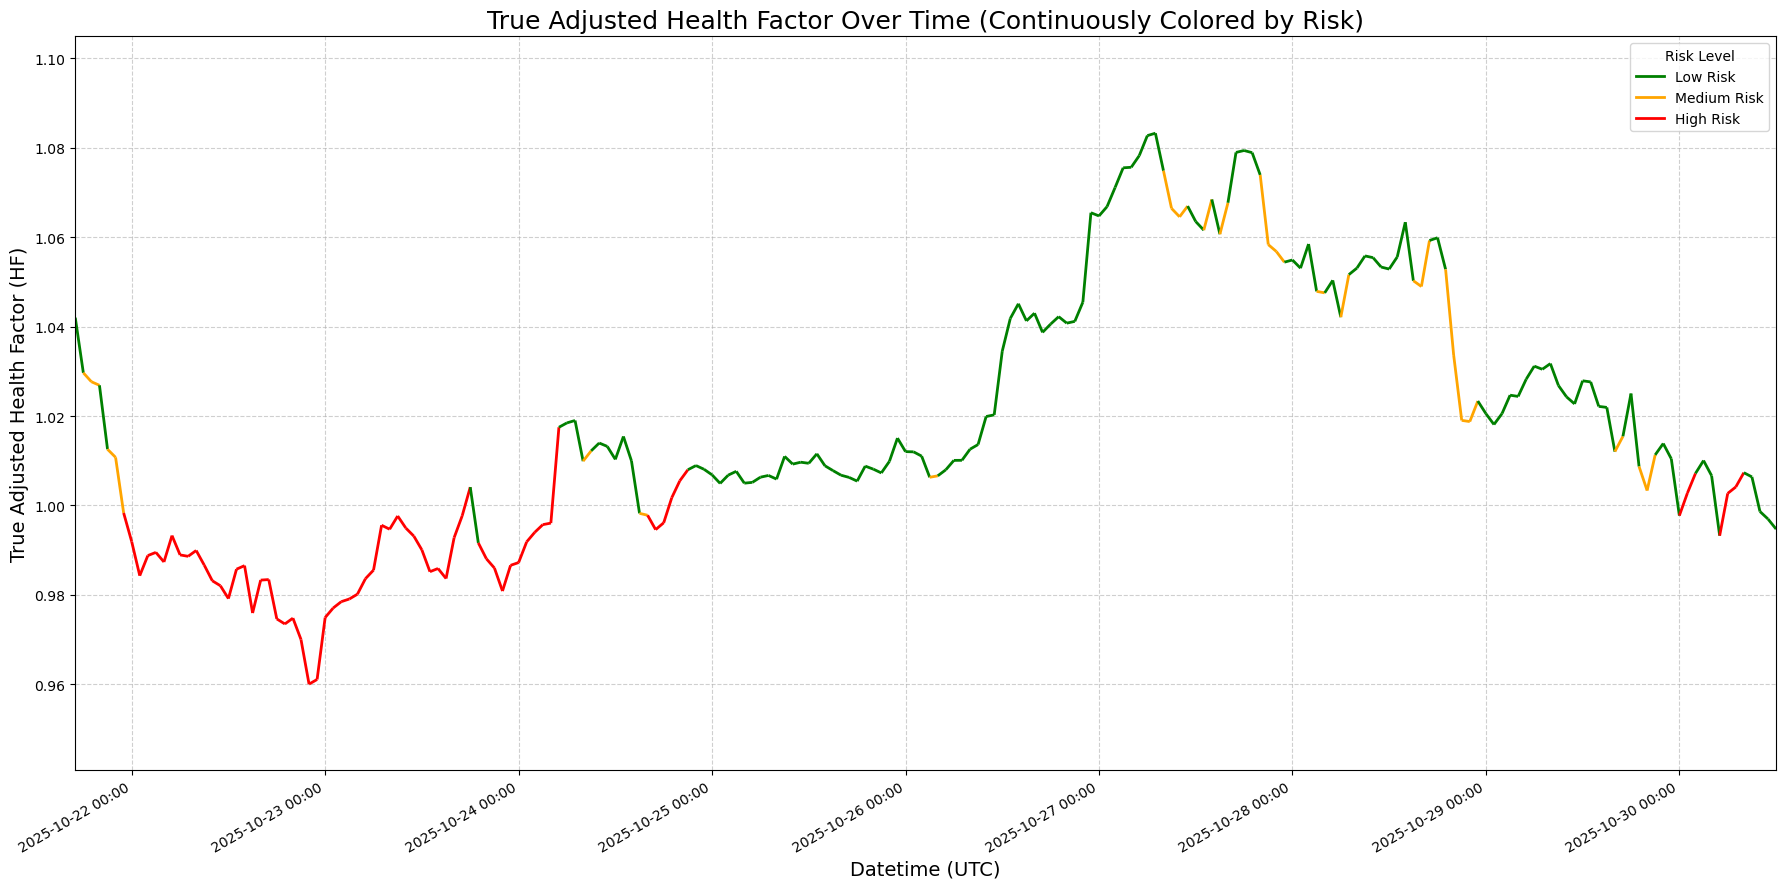

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D # (!!!) 新增: 用于创建自定义图例
import os
import numpy as np

# --- 1. 定义路径 ---
BASE_PATH = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\operation_points"
DATA_DIR = os.path.join(BASE_PATH, "data")
VIS_DIR = os.path.join(BASE_PATH, "visalization") # 您的拼写是 visalization

# 输入文件
RISK_CLASSIFICATION_FILE = os.path.join(DATA_DIR, "risk_classification_per_timestamp.csv")
TRUE_HF_FILE = r"F:\Learning_journal_at_CUHK\FTEC5520_Appl Blockchain & Cryptocur\Simulation\HF\data\true_HF\true_hf_adjusted.csv"

# 输出文件
PLOT_FILE = os.path.join(VIS_DIR, "true_hf_by_risk_level_continuous.png") # 新文件名

# 确保可视化目录存在
os.makedirs(VIS_DIR, exist_ok=True)

try:
    # --- 2. 加载和合并数据 ---
    print(f"Loading risk classification data from: {RISK_CLASSIFICATION_FILE}")
    df_risk = pd.read_csv(RISK_CLASSIFICATION_FILE)
    df_risk['datetime_utc'] = pd.to_datetime(df_risk['datetime_utc'])

    print(f"Loading true HF data from: {TRUE_HF_FILE}")
    df_true_hf = pd.read_csv(TRUE_HF_FILE)
    df_true_hf['datetime_utc'] = pd.to_datetime(df_true_hf['datetime_utc'])

    # 合并以获取每个HF时间点的风险等级
    df_plot = pd.merge(df_true_hf, df_risk[['datetime_utc', 'Risk_Level']], on='datetime_utc', how='left')
    df_plot['Risk_Level'] = df_plot['Risk_Level'].fillna('Low Risk') # 填充缺失值
    df_plot = df_plot.sort_values(by='datetime_utc').dropna() # 排序并删除任何剩余的NaN
    
    print("Data loaded and merged.")

    # (!!!) 步骤 3: 为每个风险等级创建一个颜色
    color_map = {
        'Low Risk': 'green',
        'Medium Risk': 'orange',
        'High Risk': 'red'
    }
    df_plot['color'] = df_plot['Risk_Level'].map(color_map)

    # --- 4. (!!!) 准备 LineCollection 所需的数据 ---
    
    # a. 将 X (时间) 和 Y (HF) 转换为 NumPy 数组
    # 我们必须将日期转换为 Matplotlib 的数字格式 (mdates)
    x = mdates.date2num(df_plot['datetime_utc'])
    y = df_plot['HF_adjusted'].values
    
    # b. 创建 "线段" (segments)
    #    一个线段是从 (x[i], y[i]) 到 (x[i+1], y[i+1])
    #    格式: [ [(x1, y1), (x2, y2)], [(x2, y2), (x3, y3)], ... ]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # c. 为每个线段创建颜色列表
    #    我们根据线段的 *起始点* 来为其着色
    segment_colors = df_plot['color'].iloc[:-1].values
    
    print(f"Created {len(segments)} line segments for plotting.")

    # --- 5. (!!!) 创建图表并添加 LineCollection ---
    print("Generating continuous line plot...")
    fig, ax = plt.subplots(figsize=(18, 9))
    
    # 创建 LineCollection 对象
    lc = LineCollection(segments, colors=segment_colors, linewidth=2)
    
    # 将 LineCollection 添加到图表中
    ax.add_collection(lc)

    # --- 6. (!!!) 格式化图表 ---
    
    # (重要) LineCollection 不会自动缩放坐标轴，我们必须手动设置
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min() * 0.98, y.max() * 1.02)
    
    # (重要) 告诉X轴它正在显示的是日期
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

    # 设置标题和标签 (全英文)
    ax.set_title('True Adjusted Health Factor Over Time (Continuously Colored by Risk)', fontsize=18)
    ax.set_xlabel('Datetime (UTC)', fontsize=14)
    ax.set_ylabel('True Adjusted Health Factor (HF)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # (!!!) 步骤 7: (重要) 手动创建图例 (Legend)
    # LineCollection 不会自动生成图例，我们必须创建“代理”线条
    legend_elements = [
        Line2D([0], [0], color='green', lw=2, label='Low Risk'),
        Line2D([0], [0], color='orange', lw=2, label='Medium Risk'),
        Line2D([0], [0], color='red', lw=2, label='High Risk')
    ]
    ax.legend(handles=legend_elements, title='Risk Level', loc='best')

    # --- 8. 保存图像 ---
    plt.tight_layout()
    plt.savefig(PLOT_FILE, dpi=300, bbox_inches='tight')
    print(f"Successfully saved continuous risk-colored plot to: {PLOT_FILE}")

except FileNotFoundError as e:
    print(f"\n[Error] Could not find a required file. Please check paths.")
    print(f"File not found: {e.filename}")
except Exception as e:
    print(f"\nAn error occurred: {e}")